In [4]:
import pandas as pd
from textblob import TextBlob

In [2]:
df = pd.read_csv('../datasets/tweets_ostrava_translated.csv', header=None)
df.columns = ['author_id', 'text_orig', 'date_published', 'likes', 'retweets', 'text_en']
df.head()

,author_id,text_orig,date_published,likes,retweets,text_en
0,2765861635,"Bohuzel budou do Tutecka letat dale, jen tank...",2023-03-17 02:58:29+00:00,4,1,"Unfortunately, they will continue to fly to T..."
1,946371211411513346,Já si mohu uložit tvé fotky? Bez svolení? To ...,2023-03-17 00:40:37+00:00,0,0,Can I save your pictures? Without permission?...
2,729345398,"Arsenal-Sporting, 3 hodiny zábavy 👌",2023-03-16 22:47:06+00:00,7,1,"Arsenal-Sporting, 3 hours of fun 👌"
3,864219563172532224,Levice si mne získala již ve velmi útlém věku. ✨,2023-03-16 21:21:56+00:00,31,2,The left won me over at a very young age. ✨
4,917807011152191494,tim jsem byla posedla kdyz mi bylo 11 let,2023-03-16 20:18:15+00:00,7,1,I was obsessed with it when I was 11 years old.


In [26]:
df['sentiment'] = [TextBlob(t).sentiment.polarity if type(t) == str else 0 for t in df['text_en']]
df['len_orig'] = df['text_orig'].apply(lambda t: len(t) if type(t) == str else -1)
df.head()

,author_id,text_orig,date_published,likes,retweets,text_en,sentiment,len_orig
0,2765861635,"Bohuzel budou do Tutecka letat dale, jen tank...",2023-03-17 02:58:29+00:00,4,1,"Unfortunately, they will continue to fly to T...",0.150,64
1,946371211411513346,Já si mohu uložit tvé fotky? Bez svolení? To ...,2023-03-17 00:40:37+00:00,0,0,Can I save your pictures? Without permission?...,0.050,103
2,729345398,"Arsenal-Sporting, 3 hodiny zábavy 👌",2023-03-16 22:47:06+00:00,7,1,"Arsenal-Sporting, 3 hours of fun 👌",0.300,35
3,864219563172532224,Levice si mne získala již ve velmi útlém věku. ✨,2023-03-16 21:21:56+00:00,31,2,The left won me over at a very young age. ✨,0.065,49
4,917807011152191494,tim jsem byla posedla kdyz mi bylo 11 let,2023-03-16 20:18:15+00:00,7,1,I was obsessed with it when I was 11 years old.,-0.200,42


In [27]:
df[['likes', 'retweets', 'sentiment', 'len_orig']].corr()

,likes,retweets,sentiment,len_orig
likes,1.000000,0.709140,0.008684,0.044542
retweets,0.709140,1.000000,-0.012124,0.068520
sentiment,0.008684,-0.012124,1.000000,0.013051
len_orig,0.044542,0.068520,0.013051,1.000000


array([[<Axes: title={'center': 'likes'}>,
        <Axes: title={'center': 'retweets'}>],
       [<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'len_orig'}>]], dtype=object)

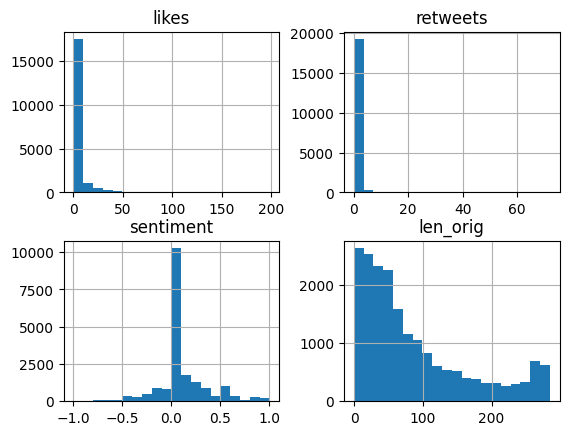

In [31]:
df[['likes', 'retweets', 'sentiment', 'len_orig']][df['likes'] < 200].hist(bins=20)